In [2]:
import time
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from common import *

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['grid.color'] = (.7, .7, .7, 0)
plt.rcParams['figure.figsize'] = (16, 10)

print('numpy ver.: ' + np.__version__)
print('pandas ver.: ' + pd.__version__)

numpy ver.: 1.13.1
pandas ver.: 0.20.1


In [3]:
data = prep_data('../data/4A_1_201705_201709.csv')
print(len(data))

1103832


In [10]:
data = data[(1 <= data['LineDirectionLinkOrder']) & (data['LineDirectionLinkOrder'] <= 32)]
assert len(data['LinkRef'].unique()) == 32
n = len(data)
print(n)

857728


In [11]:
data.groupby(['LineDirectionLinkOrder', 'LinkRef', 'LinkName']).agg({'LinkTravelTime': [np.mean, np.std]})

LinkTravelTime  \
                                                                                          mean   
LineDirectionLinkOrder LinkRef     LinkName                                                      
1                      29848:1254  Svanemøllen St., Sløjfen - Østerbrogade          159.582163   
2                      1254:1255   Østerbrogade - Thomas Laubs Gade                  45.238854   
3                      1255:10115  Thomas Laubs Gade - Kildevældsparken              42.411298   
4                      10115:10116 Kildevældsparken - Nygårdsvej                     43.601331   
5                      10116:1258  Nygårdsvej - Skt. Kjelds Plads                    54.409340   
6                      1258:1260   Skt. Kjelds Plads - Lyngbyvej                     83.812701   
7                      1260:1261   Lyngbyvej - Lersø Parkallé                        37.489254   
8                      1261:1262   Lersø Parkallé - Aldersrogade                     54.457627   
9                      1262:7035   Aldersrogade - Rovsingsgade                      186.104755   
10                     7035:2757   Rovsingsgade - Bispebjerg St.                     33.584080   
11                     2757:10017  Bispebjerg St. - Nørrebro Bycenter               123.758120   
12                     10017:1989  Nørrebro Bycenter - Nørrebro St.                 108.189754   
13                     1989:1990   Nørrebro St. - Hillerødgade                       99.540093   
14                     1990:1268   Hillerødgade - Borups Allé                        57.781880   
15                     1268:1269   Borups Allé - Mariendalsvej                       77.517948   
16                     1269:1270   Mariendalsvej - Godthåbsvej                      100.805783   
17                     1270:1272   Godthåbsvej - Nyelandsvej                         45.397333   
18                     1272:1273   Nyelandsvej - Fasanvej St.                        68.803930   
19                     1273:1274   Fasanvej St. - Peter Bangs Vej                    96.701594   
20                     1274:1275   Peter Bangs Vej - Mathildevej                     38.566715   
21                     1275:1276   Mathildevej - Roskildevej                        114.683215   
22                     1276:1277   Roskildevej - Aurikelvej                          48.095937   
23                     1277:1102   Aurikelvej - Valby Langgade                       73.883848   
24                     1102:10427  Valby Langgade - Valby St.                        84.083997   
25                     10427:1183  Valby St. - Toftegårds Plads                      73.767902   
26                     1183:2673   Toftegårds Plads - Vestre Kirkegård Nord          69.374943   
27                     2673:2675   Vestre Kirkegård Nord - Sankt Annæ Gymnasium      68.784603   
28                     2675:1188   Sankt Annæ Gymnasium - Sjælør St.                 54.248654   
29                     1188:1190   Sjælør St. - Mozarts Plads                       114.588622   
30                     1190:1192   Mozarts Plads - Bådehavnsgade                    133.677561   
31                     1192:1193   Bådehavnsgade - Sluseholmen                       50.694288   
32                     1193:2666   Sluseholmen - Artillerivej                       142.817989   

                                                                                             
                                                                                        std  
LineDirectionLinkOrder LinkRef     LinkName                                                  
1                      29848:1254  Svanemøllen St., Sløjfen - Østerbrogade       107.703114  
2                      1254:1255   Østerbrogade - Thomas Laubs Gade               13.847404  
3                      1255:10115  Thomas Laubs Gade - Kildevældsparken           19.034473  
4                      10115:10116 Kildevældsparken - Nygårdsvej                  30.

In [53]:
data_link = data[data['LinkRef'] == '1188:1190']
data_link = data_link[data_link['LinkTravelTime'].notnull()]

median = np.median(data_link['LinkTravelTime'])
mad = 1.4826 * np.median(np.abs(data_link['LinkTravelTime'] - median))
low = max(median - 4 * mad, 0)
upr = median + 4 * mad

ts_link = data_link.set_index(pd.to_datetime(data_link['DateTime']))[['LinkTravelTime']]
ts_link_mad = ts_link[(low < ts_link['LinkTravelTime']) & (ts_link['LinkTravelTime'] < upr)]
ts_link_na = ts_link[(0 < ts_link['LinkTravelTime']) & (ts_link['LinkTravelTime'] < 1000)]
ts_link_ewm = ts_link.ewm(span=12,adjust=False).mean()
low, upr

(12.113600000000005, 201.88639999999998)

In [ ]:
ts_link_na = ts_link[(0 < ts_link['LinkTravelTime']) & (ts_link['LinkTravelTime'] < 1000)]

In [44]:
data_link

,JourneyLinkRef,JourneyRef,DateTime,LineDirectionCode,LineDirectionLinkOrder,LinkRef,LinkName,DayOfWeek,LinkTravelTime,DateTimeRef,DowTimeRef
535,20170501L0004J0016#030,20170501L0004J0016,2017-05-01 06:27:35,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,107.0,2017-05-01 06:15:00,1970-01-01 06:15:00
580,20170501L0004J0017#030,20170501L0004J0017,2017-05-01 06:39:34,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,87.0,2017-05-01 06:30:00,1970-01-01 06:30:00
625,20170501L0004J0018#030,20170501L0004J0018,2017-05-01 06:51:20,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,131.0,2017-05-01 06:45:00,1970-01-01 06:45:00
670,20170501L0004J0019#030,20170501L0004J0019,2017-05-01 06:56:40,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,84.0,2017-05-01 06:45:00,1970-01-01 06:45:00
715,20170501L0004J0020#030,20170501L0004J0020,2017-05-01 07:02:34,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,88.0,2017-05-01 07:00:00,1970-01-01 07:00:00
760,20170501L0004J0021#030,20170501L0004J0021,2017-05-01 07:09:16,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,81.0,2017-05-01 07:00:00,1970-01-01 07:00:00
795,20170501L0004J0022#030,20170501L0004J0022,2017-05-01 07:14:33,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,92.0,2017-05-01 07:00:00,1970-01-01 07:00:00
840,20170501L0004J0023#030,20170501L0004J0023,2017-05-01 07:18:45,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,72.0,2017-05-01 07:15:00,1970-01-01 07:15:00
875,20170501L0004J0024#030,20170501L0004J0024,2017-05-01 07:23:34,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,128.0,2017-05-01 07:15:00,1970-01-01 07:15:00
920,20170501L0004J0025#030,20170501L0004J0025,2017-05-01 07:28:59,1,29,1188:1190,Sjælør St. - Mozarts Plads,1,81.0,2017-05-01 07:15:00,1970-01-01 07:15:00


In [98]:
median = data_link.groupby('DowTimeRef')['LinkTravelTime'].median()
mean = data_link.groupby('DowTimeRef')['LinkTravelTime'].mean()

error = pd.concat([data_link['DowTimeRef'], np.abs(data_link['LinkTravelTime'] - median[data_link['DowTimeRef']].values)], axis = 1)
mad = 1.4826 * error.groupby('DowTimeRef')['LinkTravelTime'].median()

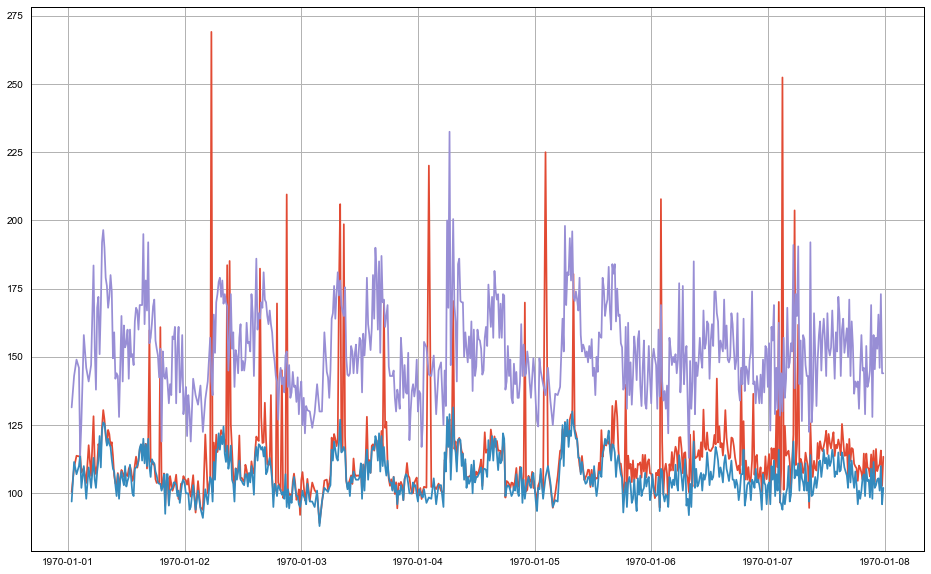

In [100]:
plt.plot(mean)
plt.plot(median)
plt.plot(median + 3 * error)

In [101]:
median + 3 * error

DowTimeRef
1970-01-01 00:45:00    131.5
1970-01-01 01:15:00    143.0
1970-01-01 01:45:00    149.0
1970-01-01 02:15:00    146.0
1970-01-01 02:30:00    114.0
1970-01-01 02:45:00    126.0
1970-01-01 03:15:00    158.0
1970-01-01 03:45:00    146.0
1970-01-01 04:15:00    141.0
1970-01-01 04:45:00    147.0
1970-01-01 05:15:00    183.5
1970-01-01 05:30:00    153.0
1970-01-01 05:45:00    138.0
1970-01-01 06:00:00    168.0
1970-01-01 06:15:00    172.0
1970-01-01 06:30:00    151.0
1970-01-01 06:45:00    168.0
1970-01-01 07:00:00    192.0
1970-01-01 07:15:00    196.5
1970-01-01 07:30:00    190.0
1970-01-01 07:45:00    179.0
1970-01-01 08:00:00    176.0
1970-01-01 08:15:00    168.0
1970-01-01 08:30:00    172.0
1970-01-01 08:45:00    180.0
1970-01-01 09:00:00    174.0
1970-01-01 09:15:00    149.5
1970-01-01 09:30:00    159.0
1970-01-01 09:45:00    142.0
1970-01-01 10:00:00    144.0
                       ...  
1970-01-07 16:30:00    150.0
1970-01-07 16:45:00    171.0
1970-01-07 17:00:00    143.0
197

In [95]:
print(error.values.shape)
print(median.shape)

(629, 1)
(629,)


In [97]:
error[]

array([[ 11.5],
       [ 10.5],
       [ 14. ],
       [ 12. ],
       [  0. ],
       [  8. ],
       [ 16. ],
       [ 16. ],
       [ 10.5],
       [ 15. ],
       [ 23.5],
       [ 16. ],
       [ 12. ],
       [ 20. ],
       [ 20. ],
       [ 10. ],
       [ 19.5],
       [ 23. ],
       [ 23.5],
       [ 21.5],
       [ 19. ],
       [ 19.5],
       [ 16. ],
       [ 18. ],
       [ 21. ],
       [ 20.5],
       [ 13.5],
       [ 17. ],
       [ 13. ],
       [ 15. ],
       [ 12. ],
       [ 10. ],
       [ 14. ],
       [ 19. ],
       [ 12. ],
       [ 19.5],
       [ 14.5],
       [ 17.5],
       [ 18.5],
       [ 12. ],
       [ 16.5],
       [ 15. ],
       [ 17. ],
       [ 16. ],
       [ 18. ],
       [ 19.5],
       [ 19. ],
       [ 16. ],
       [ 17.5],
       [ 17. ],
       [ 19. ],
       [ 25. ],
       [ 17. ],
       [ 20. ],
       [ 19. ],
       [ 24. ],
       [ 15. ],
       [ 17. ],
       [ 16.5],
       [ 19. ],
       [ 20. ],
       [ 16. ],
       [